<a href="https://colab.research.google.com/github/Lazarus-GS/NOMA-FYP-MATLAB/blob/main/ML%20Model/Hmodel4grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/Lazarus-GS/NOMA-FYP-MATLAB/main/New/simulation_dataset.csv'
df = pd.read_csv(url)
df.head()

,NearUserPos,FarUserPos,FarUserDist,TransmitPower,SNR,SumRateFarUser,SumRateNearUser,BERFarUser,BERNearUser,OutageProbFarUser,OutageProbNearUser,MAScheme
0,b2,a1,21.2132,-114,-30,0.000290,0.000290,0.5054,0.4912,1.0,1.0,OMA
1,b2,a1,21.2132,-114,-30,0.000149,0.000149,0.5055,0.4983,1.0,1.0,NOMA
2,b2,a1,21.2132,-112,-28,0.000463,0.000463,0.4990,0.4925,1.0,1.0,OMA
3,b2,a1,21.2132,-112,-28,0.000237,0.000237,0.4990,0.4973,1.0,1.0,NOMA
4,b2,a1,21.2132,-110,-26,0.000729,0.000729,0.4929,0.4870,1.0,1.0,OMA


In [ ]:
# url = 'https://raw.githubusercontent.com/Lazarus-GS/NOMA-FYP-MATLAB/main/New/simulation_dataset1.csv'
# df = pd.read_csv(url)
# df.head()

In [ ]:
oma_data = df[df['MAScheme'] == 'OMA']
noma_data = df[df['MAScheme'] == 'NOMA']

oma_grouped = oma_data.groupby('SNR').mean()
noma_grouped = noma_data.groupby('SNR').mean()

<ipython-input-28-2bbbc00a8333>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oma_grouped = oma_data.groupby('SNR').mean()
<ipython-input-28-2bbbc00a8333>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  noma_grouped = noma_data.groupby('SNR').mean()


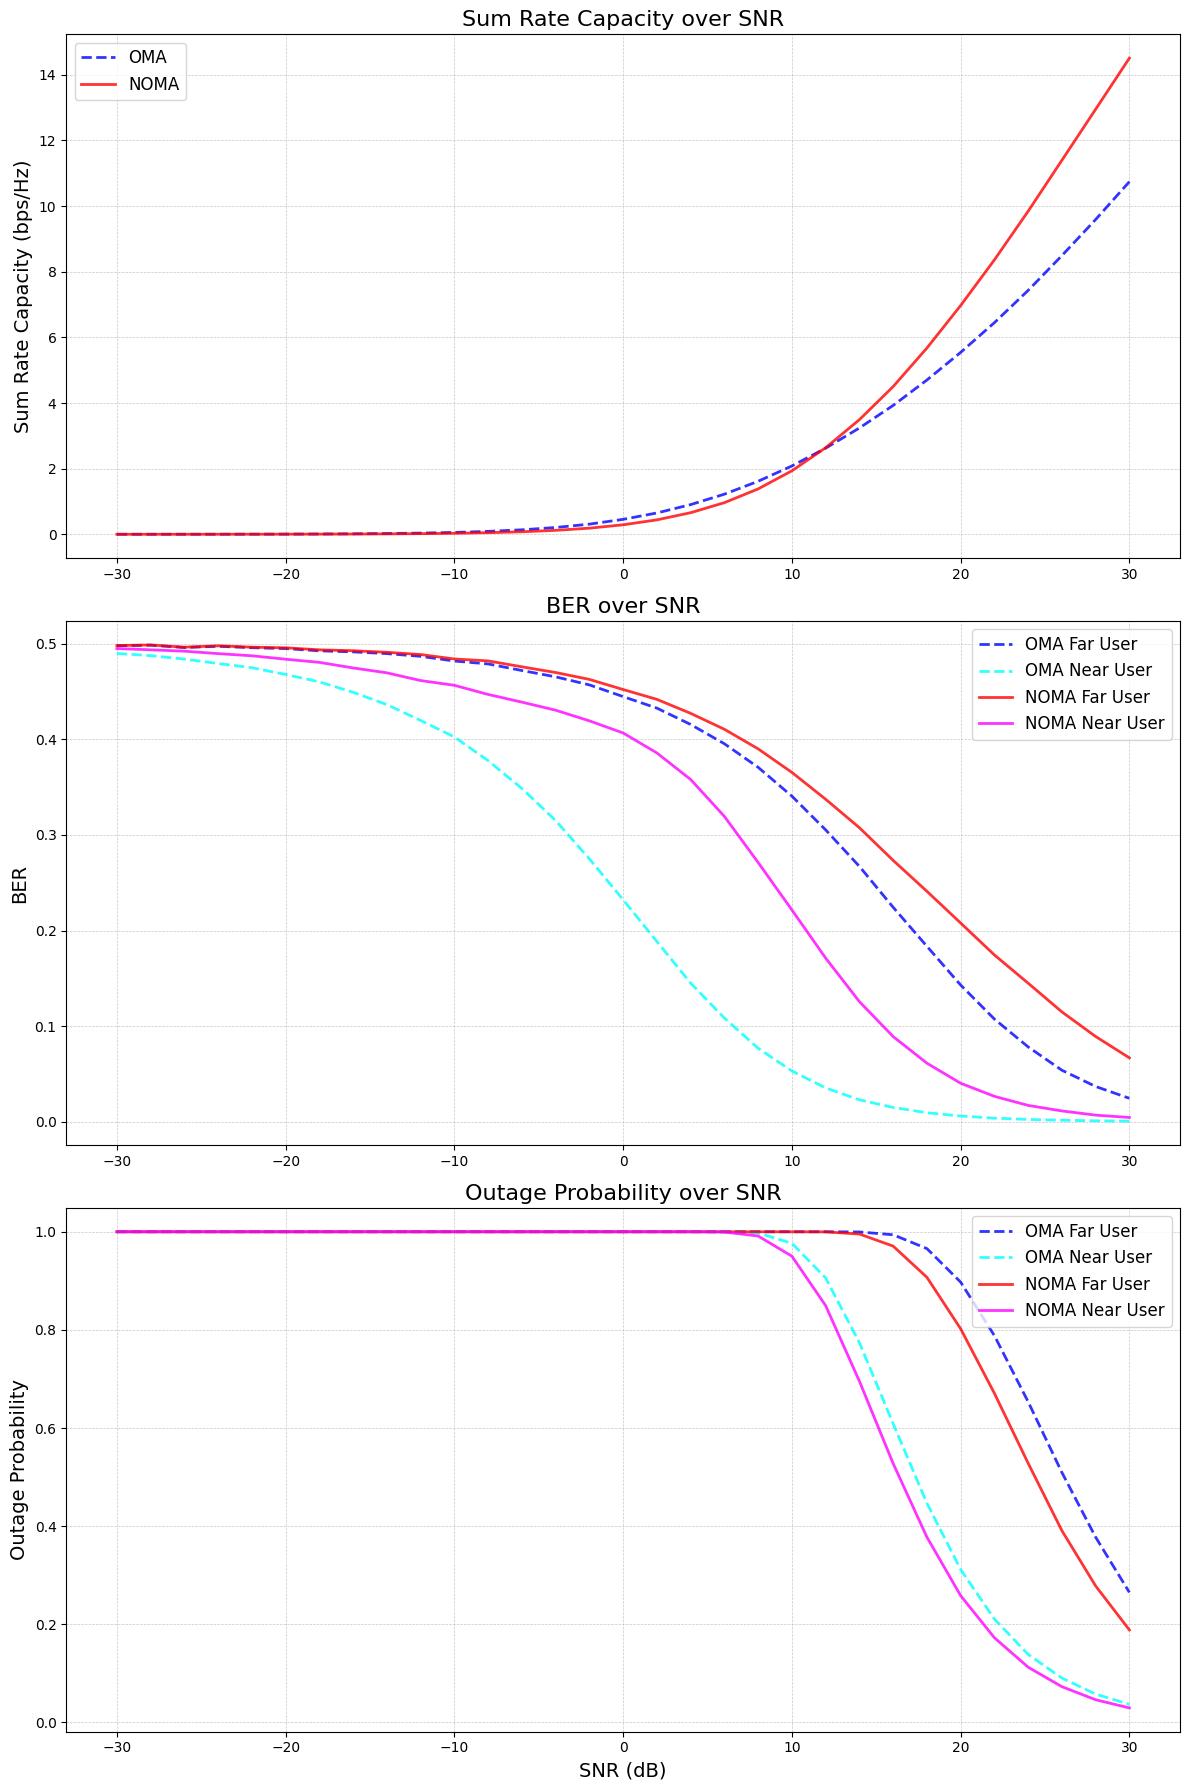

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Sum Rate Capacity over SNR
axs[0].plot(oma_grouped.index, oma_grouped['SumRateFarUser'] + oma_grouped['SumRateNearUser'], label='OMA', linestyle='--', linewidth=2, alpha=0.8, color='blue')
axs[0].plot(noma_grouped.index, noma_grouped['SumRateFarUser'] + noma_grouped['SumRateNearUser'], label='NOMA', linestyle='-', linewidth=2, alpha=0.8, color='red')
axs[0].set_title('Sum Rate Capacity over SNR', fontsize=16)
axs[0].set_ylabel('Sum Rate Capacity (bps/Hz)', fontsize=14)
axs[0].legend(loc='upper left', fontsize=12)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 2: BER over SNR
axs[1].plot(oma_grouped.index, oma_grouped['BERFarUser'], label='OMA Far User', linestyle='--', linewidth=2, alpha=0.8, color='blue')
axs[1].plot(oma_grouped.index, oma_grouped['BERNearUser'], label='OMA Near User', linestyle='--', linewidth=2, alpha=0.8, color='cyan')
axs[1].plot(noma_grouped.index, noma_grouped['BERFarUser'], label='NOMA Far User', linestyle='-', linewidth=2, alpha=0.8, color='red')
axs[1].plot(noma_grouped.index, noma_grouped['BERNearUser'], label='NOMA Near User', linestyle='-', linewidth=2, alpha=0.8, color='magenta')
axs[1].set_title('BER over SNR', fontsize=16)
axs[1].set_ylabel('BER', fontsize=14)
axs[1].legend(loc='upper right', fontsize=12)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 3: Outage Probability over SNR
axs[2].plot(oma_grouped.index, oma_grouped['OutageProbFarUser'], label='OMA Far User', linestyle='--', linewidth=2, alpha=0.8, color='blue')
axs[2].plot(oma_grouped.index, oma_grouped['OutageProbNearUser'], label='OMA Near User', linestyle='--', linewidth=2, alpha=0.8, color='cyan')
axs[2].plot(noma_grouped.index, noma_grouped['OutageProbFarUser'], label='NOMA Far User', linestyle='-', linewidth=2, alpha=0.8, color='red')
axs[2].plot(noma_grouped.index, noma_grouped['OutageProbNearUser'], label='NOMA Near User', linestyle='-', linewidth=2, alpha=0.8, color='magenta')
axs[2].set_title('Outage Probability over SNR', fontsize=16)
axs[2].set_xlabel('SNR (dB)', fontsize=14)
axs[2].set_ylabel('Outage Probability', fontsize=14)
axs[2].legend(loc='upper right', fontsize=12)
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Normalize the metrics using global min-max values
def normalize(series, global_min, global_max):
    normalized = (series - global_min) / (global_max - global_min)
    return normalized.round(20)

# Global min-max values for each metric
global_min_capacity = (df['SumRateFarUser'] + df['SumRateNearUser']).min()
global_max_capacity = (df['SumRateFarUser'] + df['SumRateNearUser']).max()

global_min_ber = df[['BERFarUser', 'BERNearUser']].min().min()
global_max_ber = df[['BERFarUser', 'BERNearUser']].max().max()

global_min_outage = df[['OutageProbFarUser', 'OutageProbNearUser']].min().min()
global_max_outage = df[['OutageProbFarUser', 'OutageProbNearUser']].max().max()

# Apply normalization
df['NormalizedCapacity'] = normalize(df['SumRateFarUser'] + df['SumRateNearUser'], global_min_capacity, global_max_capacity)
df['NormalizedBER'] = normalize(df['BERFarUser'] + df['BERNearUser'], global_min_ber, global_max_ber)
df['NormalizedOutage'] = normalize(df['OutageProbFarUser'] + df['OutageProbNearUser'], global_min_outage, global_max_outage)

# Calculate the score
w1, w2, w3 = 0.5, 0.25, 0.25
df['Score'] = w1 * df['NormalizedCapacity'] - w2 * df['NormalizedBER'] - w3 * df['NormalizedOutage']

# Normalize the score across the entire dataset
df['Score'] = normalize(df['Score'], df['Score'].min(), df['Score'].max())

result_df = pd.DataFrame()

for (near_user, far_user, snr), group in df.groupby(['NearUserPos', 'FarUserPos', 'SNR']):
    result_df = result_df.append(group)

    best_row = group.loc[group['Score'].idxmax()].copy()
    best_row['MAScheme'] = 'DyMA'
    result_df = result_df.append(best_row)

result_df.reset_index(drop=True, inplace=True)

print(result_df)


Streaming output truncated to the last 5000 lines.
<ipython-input-30-b51882d9f372>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(group)
<ipython-input-30-b51882d9f372>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(best_row)
<ipython-input-30-b51882d9f372>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(group)
<ipython-input-30-b51882d9f372>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(best_row)
<ipython-input-30-b51882d9f372>:31: FutureWarning: The frame.append method is deprecated and will be removed from p

     NearUserPos FarUserPos  FarUserDist  TransmitPower  SNR  SumRateFarUser  \
0             b2         a1      21.2132           -114  -30        0.000290   
1             b2         a1      21.2132           -114  -30        0.000149   
2             b2         a1      21.2132           -114  -30        0.000290   
3             b2         a1      21.2132           -112  -28        0.000463   
4             b2         a1      21.2132           -112  -28        0.000237   
...          ...        ...          ...            ...  ...             ...   
4459          c3         d4      21.2132            -56   28        6.260753   
4460          c3         d4      21.2132            -56   28        6.260753   
4461          c3         d4      21.2132            -54   30        5.001220   
4462          c3         d4      21.2132            -54   30        7.057382   
4463          c3         d4      21.2132            -54   30        7.057382   

      SumRateNearUser  BERFarUser  BERN

<ipython-input-30-b51882d9f372>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(group)
<ipython-input-30-b51882d9f372>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(best_row)
<ipython-input-30-b51882d9f372>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(group)
<ipython-input-30-b51882d9f372>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(best_row)
<ipython-input-30-b51882d9f372>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [ ]:
result_df.head(100)

,NearUserPos,FarUserPos,FarUserDist,TransmitPower,SNR,SumRateFarUser,SumRateNearUser,BERFarUser,BERNearUser,OutageProbFarUser,OutageProbNearUser,MAScheme,NormalizedCapacity,NormalizedBER,NormalizedOutage,Score
0,b2,a1,21.2132,-114,-30,0.000290,0.000290,0.5054,0.4912,1.0,1.0,OMA,1.927019e-05,1.943816,2.026273,0.004855
1,b2,a1,21.2132,-114,-30,0.000149,0.000149,0.5055,0.4983,1.0,1.0,NOMA,2.491637e-07,1.957862,2.026273,0.002419
2,b2,a1,21.2132,-114,-30,0.000290,0.000290,0.5054,0.4912,1.0,1.0,DyMA,1.927019e-05,1.943816,2.026273,0.004855
3,b2,a1,21.2132,-112,-28,0.000463,0.000463,0.4990,0.4925,1.0,1.0,OMA,4.248559e-05,1.933867,2.026273,0.006585
4,b2,a1,21.2132,-112,-28,0.000237,0.000237,0.4990,0.4973,1.0,1.0,NOMA,1.215976e-05,1.943231,2.026273,0.004954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,b2,a2,15.8110,-114,-30,0.000302,0.000290,0.4969,0.4848,1.0,1.0,DyMA,2.005915e-05,1.914748,2.026273,0.009884
96,b2,a2,15.8110,-112,-28,0.000475,0.000463,0.4925,0.4997,1.0,1.0,OMA,4.331639e-05,1.935232,2.026273,0.006349
97,b2,a2,15.8110,-112,-28,0.000256,0.000237,0.4932,0.5049,1.0,1.0,NOMA,1.341181e-05,1.946742,2.026273,0.004347
98,b2,a2,15.8110,-112,-28,0.000475,0.000463,0.4925,0.4997,1.0,1.0,DyMA,4.331639e-05,1.935232,2.026273,0.006349


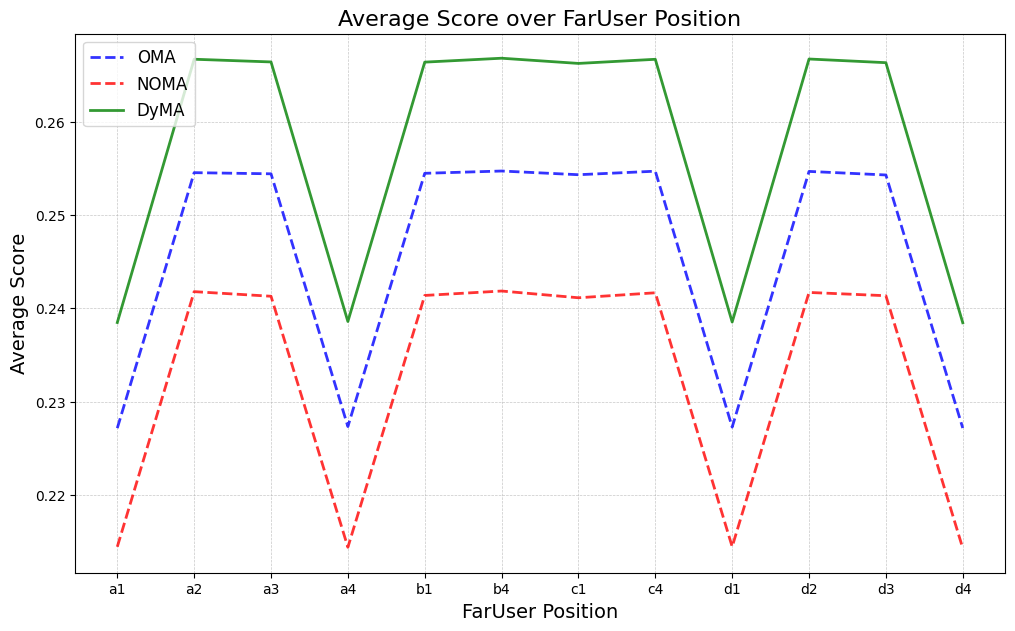

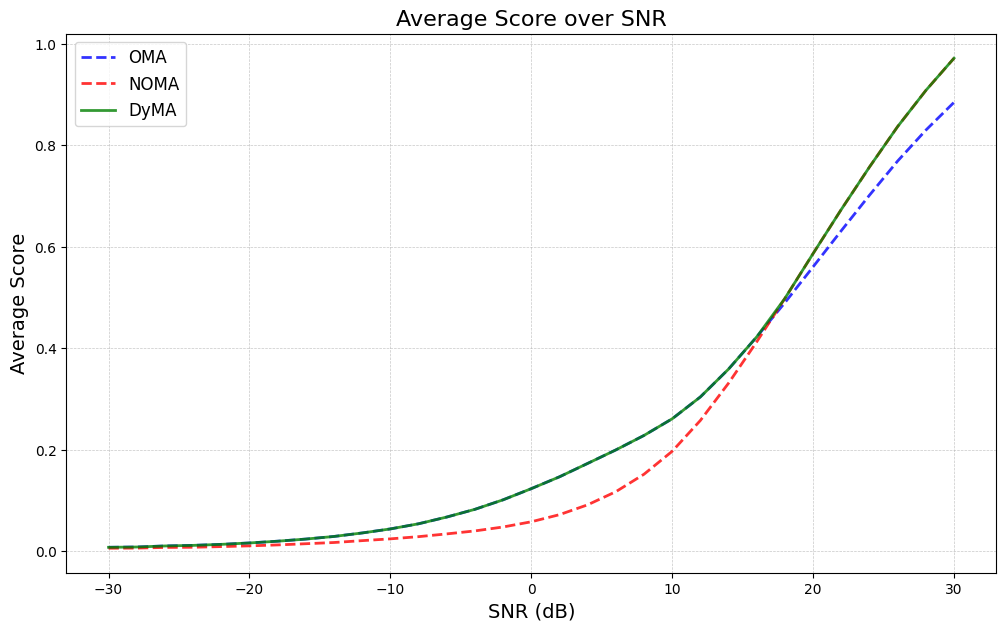

In [ ]:
# Group by FarUserPos and compute average score
grouped_by_faruser = result_df.groupby(['MAScheme', 'FarUserPos'])['Score'].mean().reset_index()

# Plotting Average Score over FarUser Position
plt.figure(figsize=(12, 7))
colors = {'OMA': 'blue', 'NOMA': 'red', 'DyMA': 'green'}
for scheme in ['OMA', 'NOMA', 'DyMA']:
    subset = grouped_by_faruser[grouped_by_faruser['MAScheme'] == scheme]
    plt.plot(subset['FarUserPos'], subset['Score'], label=scheme, linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=colors[scheme])

plt.title('Average Score over FarUser Position', fontsize=16)
plt.xlabel('FarUser Position', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Group by SNR and compute average score
grouped_by_snr = result_df.groupby(['MAScheme', 'SNR'])['Score'].mean().reset_index()

# Plotting Average Score over SNR
plt.figure(figsize=(12, 7))
for scheme in ['OMA', 'NOMA', 'DyMA']:
    subset = grouped_by_snr[grouped_by_snr['MAScheme'] == scheme]
    plt.plot(subset['SNR'], subset['Score'], label=scheme, linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8,color=colors[scheme])

plt.title('Average Score over SNR', fontsize=16)
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

<ipython-input-33-2030868727d2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = result_df.groupby(['MAScheme', 'SNR']).mean().reset_index()


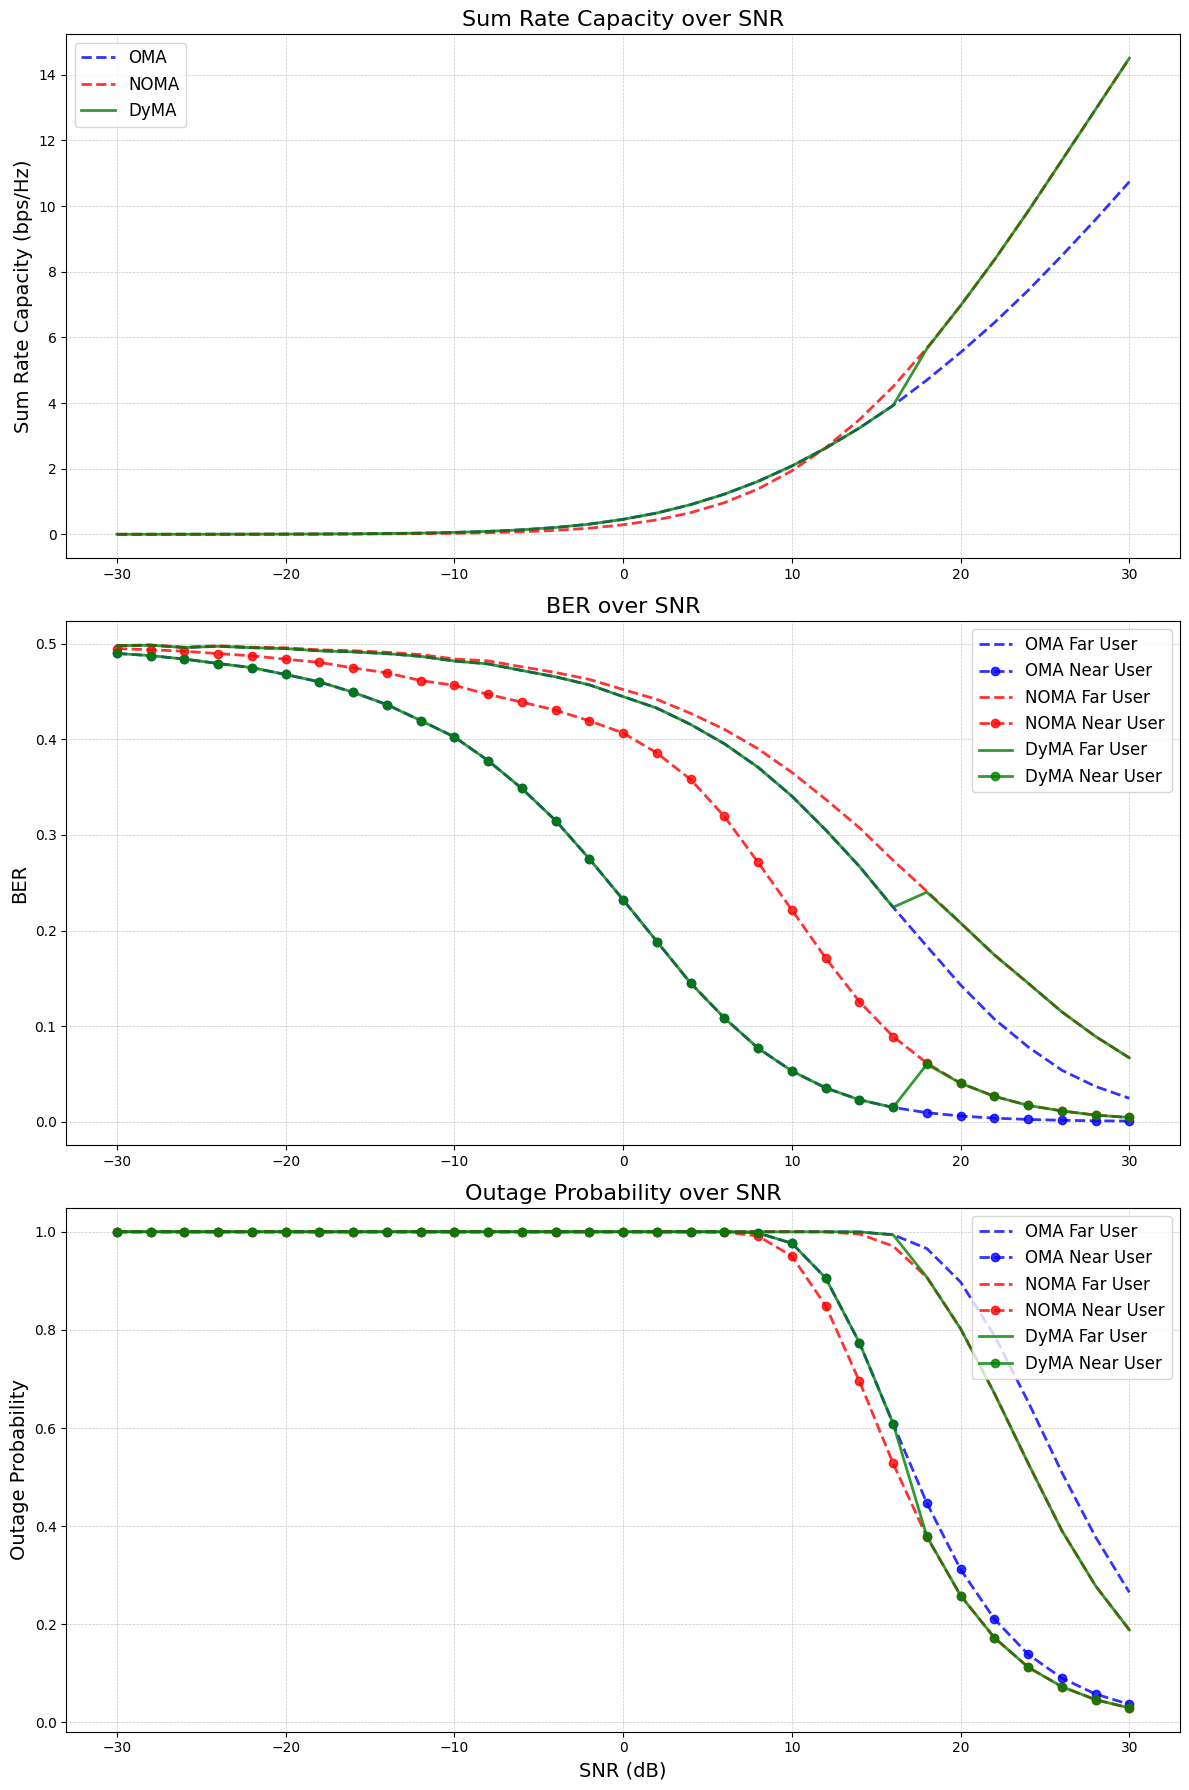

In [ ]:
grouped = result_df.groupby(['MAScheme', 'SNR']).mean().reset_index()

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Sum Rate Capacity over SNR
for scheme, color in [('OMA', 'blue'), ('NOMA', 'red'), ('DyMA', 'green')]:
    subset = grouped[grouped['MAScheme'] == scheme]
    axs[0].plot(subset['SNR'], subset['SumRateFarUser'] + subset['SumRateNearUser'], label=scheme, linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color)

axs[0].set_title('Sum Rate Capacity over SNR', fontsize=16)
axs[0].set_ylabel('Sum Rate Capacity (bps/Hz)', fontsize=14)
axs[0].legend(loc='upper left', fontsize=12)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 2: BER over SNR
for scheme, color in [('OMA', 'blue'), ('NOMA', 'red'), ('DyMA', 'green')]:
    subset = grouped[grouped['MAScheme'] == scheme]
    axs[1].plot(subset['SNR'], subset['BERFarUser'], label=f'{scheme} Far User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color)
    axs[1].plot(subset['SNR'], subset['BERNearUser'], label=f'{scheme} Near User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color, marker='o')

axs[1].set_title('BER over SNR', fontsize=16)
axs[1].set_ylabel('BER', fontsize=14)
axs[1].legend(loc='upper right', fontsize=12)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 3: Outage Probability over SNR
for scheme, color in [('OMA', 'blue'), ('NOMA', 'red'), ('DyMA', 'green')]:
    subset = grouped[grouped['MAScheme'] == scheme]
    axs[2].plot(subset['SNR'], subset['OutageProbFarUser'], label=f'{scheme} Far User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color)
    axs[2].plot(subset['SNR'], subset['OutageProbNearUser'], label=f'{scheme} Near User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color, marker='o')

axs[2].set_title('Outage Probability over SNR', fontsize=16)
axs[2].set_xlabel('SNR (dB)', fontsize=14)
axs[2].set_ylabel('Outage Probability', fontsize=14)
axs[2].legend(loc='upper right', fontsize=12)
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
def save_single_subplot(ax_to_save, filename):
    # Hide all subplots
    for ax in axs:
        ax.set_visible(False)
    # Only show the subplot we want to save
    ax_to_save.set_visible(True)
    # Save the figure
    fig.savefig(filename, dpi=300)
    # Show all subplots again
    for ax in axs:
        ax.set_visible(True)

save_single_subplot(axs[0], 'sum_rate_capacity_over_snr.png')
save_single_subplot(axs[1], 'ber_over_snr.png')
save_single_subplot(axs[2], 'outage_probability_over_snr.png')


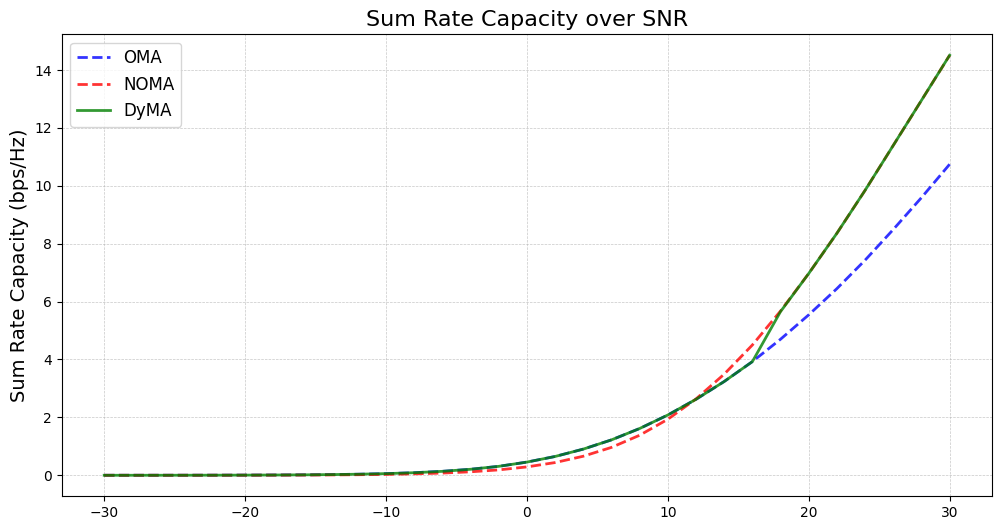

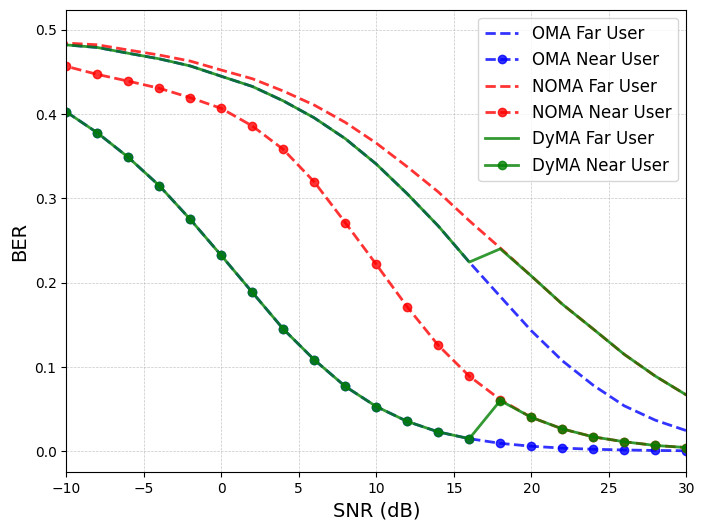

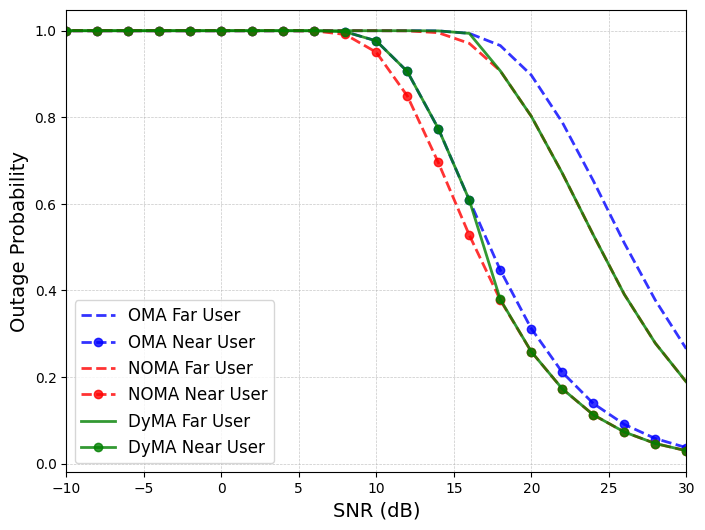

In [ ]:
import matplotlib.pyplot as plt

# [Your code for data preparation goes here...]

# Plot 1: Sum Rate Capacity over SNR
fig1, ax1 = plt.subplots(figsize=(12, 6))
for scheme, color in [('OMA', 'blue'), ('NOMA', 'red'), ('DyMA', 'green')]:
    subset = grouped[grouped['MAScheme'] == scheme]
    ax1.plot(subset['SNR'], subset['SumRateFarUser'] + subset['SumRateNearUser'], label=scheme, linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color)

ax1.set_title('Sum Rate Capacity over SNR', fontsize=16)
ax1.set_ylabel('Sum Rate Capacity (bps/Hz)', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
fig1.savefig('sum_rate_capacity_over_snr.png', dpi=300)

# Plot 2: BER over SNR (1:1 aspect ratio)
fig2, ax2 = plt.subplots(figsize=(8, 6))
for scheme, color in [('OMA', 'blue'), ('NOMA', 'red'), ('DyMA', 'green')]:
    subset = grouped[grouped['MAScheme'] == scheme]
    ax2.plot(subset['SNR'], subset['BERFarUser'], label=f'{scheme} Far User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color)
    ax2.plot(subset['SNR'], subset['BERNearUser'], label=f'{scheme} Near User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color, marker='o')

ax2.set_xlabel('SNR (dB)', fontsize=14)
ax2.set_ylabel('BER', fontsize=14)
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax2.set_xlim([-10, 30])
fig2.savefig('ber_over_snr.png', dpi=300)

# Plot 3: Outage Probability over SNR (1:1 aspect ratio)
fig3, ax3 = plt.subplots(figsize=(8, 6))
for scheme, color in [('OMA', 'blue'), ('NOMA', 'red'), ('DyMA', 'green')]:
    subset = grouped[grouped['MAScheme'] == scheme]
    ax3.plot(subset['SNR'], subset['OutageProbFarUser'], label=f'{scheme} Far User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color)
    ax3.plot(subset['SNR'], subset['OutageProbNearUser'], label=f'{scheme} Near User', linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color, marker='o')

ax3.set_xlabel('SNR (dB)', fontsize=14)
ax3.set_ylabel('Outage Probability', fontsize=14)
ax3.legend(loc='lower left', fontsize=12)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax3.set_xlim([-10, 30])
fig3.savefig('outage_probability_over_snr.png', dpi=300)

plt.show()

In [ ]:
import numpy as np

# Calculate AUC for each averaged metric and scheme
def calculate_auc(df, metric_far, metric_near):
    df['AverageMetric'] = (df[metric_far] + df[metric_near]) / 2
    grouped = df.groupby(['MAScheme', 'SNR']).mean().reset_index()
    auc_values = {}
    for scheme in ['OMA', 'NOMA', 'DyMA']:
        subset = grouped[grouped['MAScheme'] == scheme]
        auc = np.trapz(subset['AverageMetric'], subset['SNR'])
        auc_values[scheme] = auc
    return auc_values

# Calculate efficiency
def calculate_efficiency(DyMA_auc, other_auc):
    return (DyMA_auc - other_auc) / other_auc * 100

# Metrics to evaluate
metrics = [('SumRateFarUser', 'SumRateNearUser'),
           ('BERFarUser', 'BERNearUser'),
           ('OutageProbFarUser', 'OutageProbNearUser')]

for metric_far, metric_near in metrics:
    auc_values = calculate_auc(result_df, metric_far, metric_near)
    print(f"\nEfficiency of DyMA over OMA for average of {metric_far} and {metric_near}: {calculate_efficiency(auc_values['DyMA'], auc_values['OMA'])}%")
    print(f"Efficiency of DyMA over NOMA for average of {metric_far} and {metric_near}: {calculate_efficiency(auc_values['DyMA'], auc_values['NOMA'])}%")



Efficiency of DyMA over OMA for average of SumRateFarUser and SumRateNearUser: 22.787207072826813%
Efficiency of DyMA over NOMA for average of SumRateFarUser and SumRateNearUser: 0.9885261484484666%

Efficiency of DyMA over OMA for average of BERFarUser and BERNearUser: 2.9615827549708302%
Efficiency of DyMA over NOMA for average of BERFarUser and BERNearUser: -11.358171413719372%

Efficiency of DyMA over OMA for average of OutageProbFarUser and OutageProbNearUser: -1.6787327560862029%
Efficiency of DyMA over NOMA for average of OutageProbFarUser and OutageProbNearUser: 0.5478957801634851%


<ipython-input-36-a4a7a42e3a2e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['MAScheme', 'SNR']).mean().reset_index()
<ipython-input-36-a4a7a42e3a2e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['MAScheme', 'SNR']).mean().reset_index()
<ipython-input-36-a4a7a42e3a2e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['MAScheme', 'SNR']).mean().res

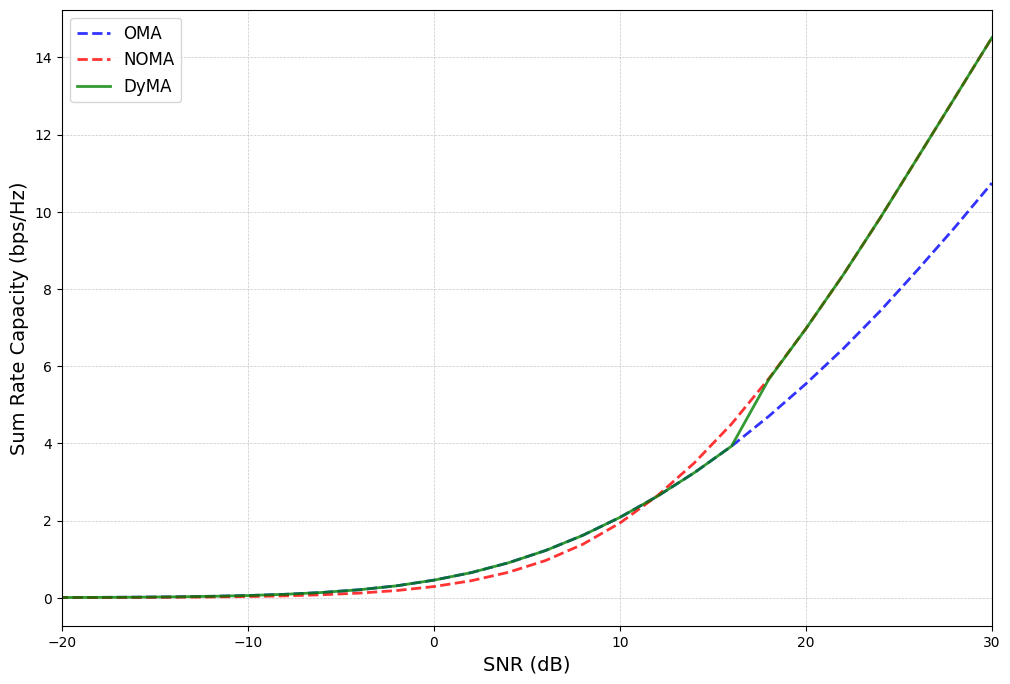

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
for scheme, color in [('OMA', 'blue'), ('NOMA', 'red'), ('DyMA', 'green')]:
    subset = grouped[grouped['MAScheme'] == scheme]
    ax1.plot(subset['SNR'], subset['SumRateFarUser'] + subset['SumRateNearUser'], label=scheme, linestyle='--' if scheme == 'OMA' else '--' if scheme == 'NOMA' else '-', linewidth=2, alpha=0.8, color=color)

ax1.set_ylabel('Sum Rate Capacity (bps/Hz)', fontsize=14)
ax1.set_xlabel('SNR (dB)', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.set_xlim([-20, 30])
fig1.savefig('sum_rate_capacity_over_snr.png', dpi=300)